In [8]:
pip install pynapple matplotlib dandi dandischema

Note: you may need to restart the kernel to use updated packages.



Grid Cell Tutorial
=========================

*Author: Dhruv Mehrotra and Guillaume Viejo*


This notebook demonstrates how we use Pynapple on various publicly available datasets in systems neuroscience to streamline analysis. In this notebook, we will examine the dataset from [Sargolini et al (2006)](https://www.science.org/doi/10.1126/science.1125572). The entire dataset can be downloaded  <a href="https://dandiarchive.org/dandiset/000582" target="_blank">here</a>. 

***

**Note:** This tutorial uses matplotlib for displaying the figure as well as the dandi package
You can install all with `pip install matplotlib seaborn dandi dandischema`

***

DANDI
-----
DANDI allows you to stream data without downloading all the files. In this case, the data extracted from the NWB file are stored in the nwb-cache folder. To do so, run the following lines of code:



In [9]:
from pynwb import NWBHDF5IO

from dandi.dandiapi import DandiAPIClient
import fsspec
from fsspec.implementations.cached import CachingFileSystem
import h5py


# Ecephys
dandiset_id, filepath = (
    "000582",
    "sub-10073/sub-10073_ses-17010302_behavior+ecephys.nwb",
)


with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, "draft").get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

# First, create a virtual filesystem based on the http protocol
fs = fsspec.filesystem("http")

# Create a cache to save downloaded data to disk (optional)
fs = CachingFileSystem(
    fs=fs,
    cache_storage="nwb-cache",  # Local folder for the cache
)

# Next, open the file
file = h5py.File(fs.open(s3_url, "rb"))
io = NWBHDF5IO(file=file, load_namespaces=True)

Pynapple
--------
If opening the NWB works, you can start streaming data straight into pynapple with the `NWBFile` class.



In [10]:
#Import matplotlib.pyplot, numpy, pynapple and seaborn libraries

data = nap.NWBFile(io.read())

print(data)

17010302
┍━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│ Keys                │ Type     │
┝━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│ units               │ TsGroup  │
│ ElectricalSeriesLFP │ Tsd      │
│ SpatialSeriesLED1   │ TsdFrame │
│ ElectricalSeries    │ Tsd      │
┕━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙


We can load the spikes as a TsGroup for inspection.



In [4]:
# Get spike timings
spikes = 

# What does this look like? 
print(spikes)

  Index    rate  unit_name    histology    hemisphere      depth
-------  ------  -----------  -----------  ------------  -------
      0    2.93  t1c1         MEC LII                     0.0024
      1    1.5   t2c1         MEC LII                     0.0024
      2    2.58  t2c3         MEC LII                     0.0024
      3    1.13  t3c1         MEC LII                     0.0024
      4    1.29  t3c2         MEC LII                     0.0024
      5    1.36  t3c3         MEC LII                     0.0024
      6    2.89  t3c4         MEC LII                     0.0024
      7    1.47  t4c1         MEC LII                     0.0024


This dataset contains units recorded from layer 2 of the medial entorhinal cortex. This brain region has neurons that fire periodically in space, forming a grid-like pattern in the environment. These cells are called *grid cells*, and their discovery was the basis of the Nobel Prize in Physiology in the year 2014!

To examine the activity of these cells, we plot their firing rate as a function of the animal's position. This plot is referred to as a 'tuning curve'. To plot tuning curves, we need the spike timings and the position information of the animal. 

Let's look at the position of the animal:

In [5]:
position = data["SpatialSeriesLED1"]

# What does this look like? 
print(position)

Time (s)            x         y
----------  ---------  --------
0.0         -0.442795  17.1039
0.02        -0.442795  17.1039
0.04         1.26778   16.8596
0.06         1.26778   16.8596
0.08        -0.198426  17.1039
...
599.9        2.24526    4.88552
599.92       2.24526    4.88552
599.94       2.00089    6.84047
599.96       2.00089    6.84047
599.98       0.779046   4.64115
dtype: float64, shape: (30000, 2)


Computing tuning curves in Pynapple takes just a single line of code! 

**Note**: Position is a 2-dimensional variable, so use the right tuning curve function! 



In [7]:
# Compute the tuning curves 

tuning_curves, xybins = 

{0: array([[ 8.41612212, 11.86983186,  5.2818662 ,  4.28585715,  1.04170139,
         0.59525794,  0.        ,  0.35462175,  0.        ,  0.        ,
         6.63738939, 16.19101589, 21.18714692, 11.87539585,  8.82382354,
         4.12101649,  4.16680556,  6.63738939,  0.        ,  0.        ],
       [ 1.42861905,  2.89026975,  2.250075  ,  0.48078526,  2.05486302,
         0.        ,  1.40849765,  1.16282946,  1.04170139,  4.00013334,
         4.05418919, 18.00060002, 19.92820051,  6.8184091 ,  6.7903498 ,
         1.20971774,  1.06670222,  0.49021242,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.36765931,  0.        ,  0.90912121,
         0.        ,  0.        ,  0.        ,  2.58629311,  3.38994351,
         8.5717143 ,  9.37531251,  5.55574075, 31.2510417 ,  8.92886906,
        10.90945456,  0.        ,  0.77521964,  0.        ,  0.        ],
       [ 0.        ,  0.61730453,  0.        ,  1.04170139,  0.        ,
         0.        ,  1.23460905,  0.       

/home/dhruv/pynapple_DM/pynapple/process/tuning_curves.py:204: RuntimeWarning: invalid value encountered in divide
  count = count / occupancy


If you print the variable above, you will discover a 2-dimensional histogram of spikes binned according to the X- and Y- positions, for each unit.

Let's now visualize the tuning curves:



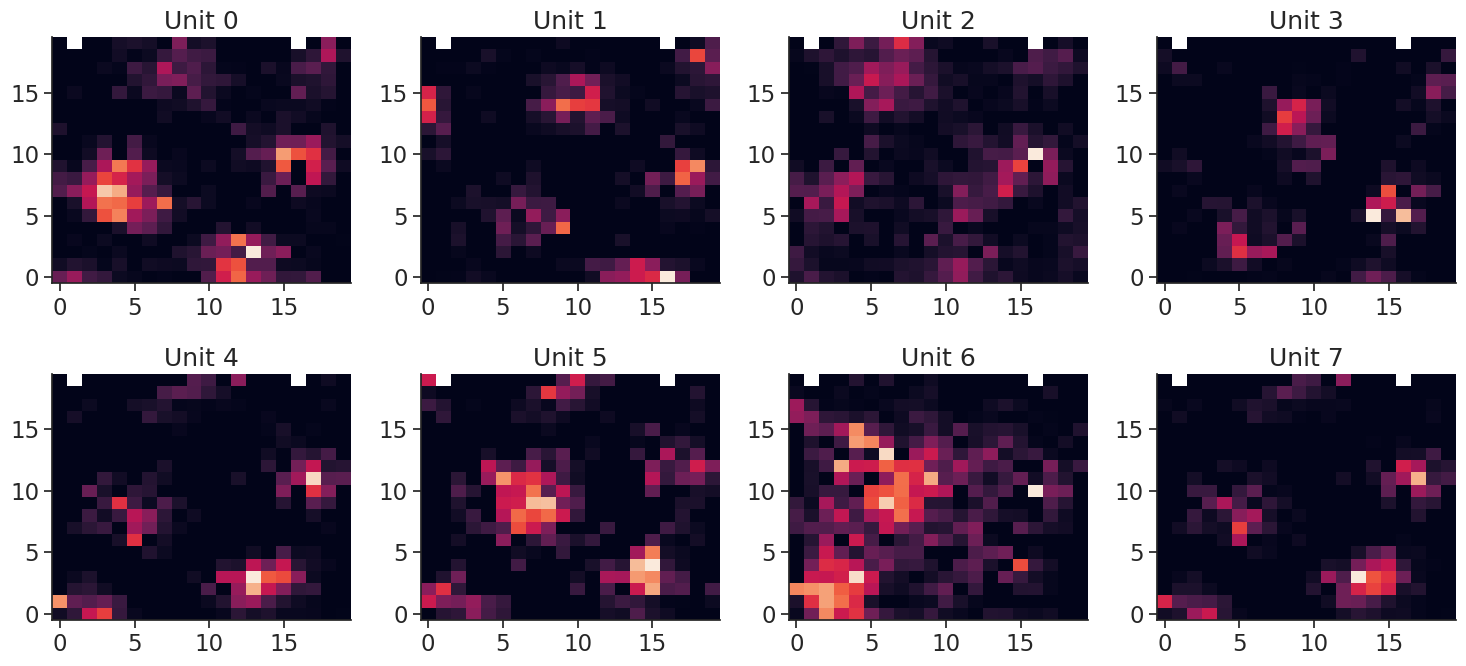

In [12]:
# Plot the tuning curves 



These units all have periodic firing patterns that span, or *tesselate* the square recording arena. They are typical examples of grid cells.

Now, let's plot the trajectory of the animal, and overlay the spike timings of the second unit (which has a nice *grid field*). This way, we can appreciate the periodic firing patterns of grid cells just by visualizing the raw data!

**Hint**: We need to use a Pynapple function that would help determine the closest position in the time support for each spike.

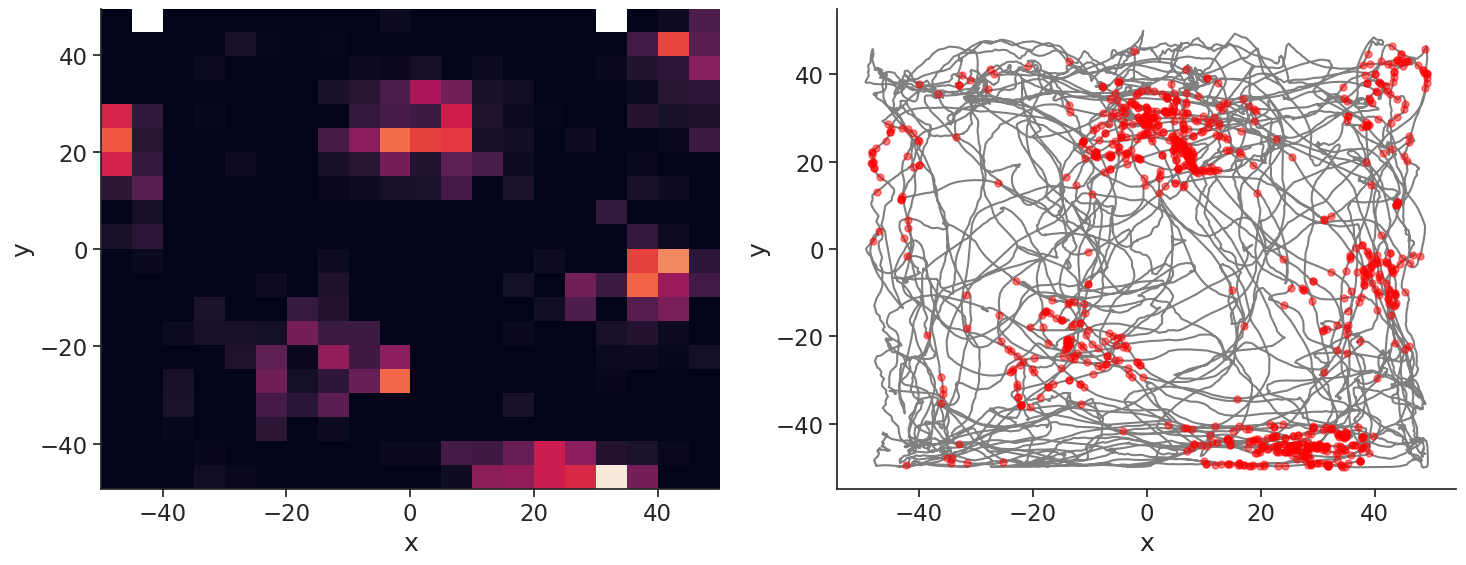

In [16]:
#Plot the trajectory of the animal and overlay the spike timings of the second unit



This plot verifies what we visualized in the grid cell tuning curves above, that this cell has a periodic firing pattern that tesselates the recording arena. Therefore, this is a grid cell!

I hope this tutorial was helpful. If you have any questions, comments or suggestions, please feel free to reach out to the Pynapple Team!